# Michael Marshall

## Project 4

#### I have chosen to analyze loan information based on a dataset provided by Lending Club.  I will answer the following questions:  
###### What factors most explain on-time loan repayments? and if I were a lender what would I opt for to determine if a given loan should be given?

# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, model_selection, metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Import and Clean Data

In [2]:
loan = pd.read_csv('/Users/Marshall2/Downloads/lending-club-loan-data/loan.csv', low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Removal

In [3]:
# I have decided to drop the following columns as they will not serve a purpose being that they are future values or they 
# are predominantely null values

In [4]:
loan = loan.drop(['desc','mths_since_last_delinq','mths_since_last_record', 'last_pymnt_d','zip_code','url','last_credit_pull_d','next_pymnt_d','verification_status',
'mths_since_last_major_derog','issue_d','out_prncp','title','open_acc_6m','open_il_6m','open_il_12m','out_prncp_inv','addr_state','annual_inc_joint','member_id',
'collection_recovery_fee','delinq_2yrs','initial_list_status','total_rev_hi_lim', 'open_il_24m','max_bal_bc','total_bal_il','dti_joint','total_cu_tl',
'il_util','funded_amnt','funded_amnt_inv','total_pymnt','earliest_cr_line','id','revol_util','tot_cur_bal','open_rv_12m','emp_title','verification_status_joint',
'open_rv_24m','max_bal_bc','all_util','total_pymnt_inv','recoveries','collections_12_mths_ex_med','revol_bal','sub_grade','tot_coll_amt','inq_fi',
'inq_last_12m','inq_last_6mths','mths_since_rcnt_il','total_rec_prncp','total_rec_int','total_rec_late_fee','last_pymnt_amnt'], axis=1)


In [5]:
# I have also decided to drop any records that fall under the following statuses:
# "Does Not Meet the Credit Policy. Status:Fully Paid"
# "Does Not Meet the Credit Policy. Status:Charged Off"
# "Issued"
# "In Grace Period"

In [6]:
loan = loan[loan.loan_status != "Does not meet the credit policy. Status:Fully Paid"]
loan = loan[loan.loan_status != "Does not meet the credit policy. Status:Charged Off"]
loan = loan[loan.loan_status != "Issued"]
loan = loan[loan.loan_status != "In Grace Period"]

loan = loan[loan.home_ownership != "OTHER"]
loan = loan[loan.home_ownership != "NONE"]
loan = loan[loan.home_ownership != "ANY"]

In [7]:
loan = loan.dropna()

# Exploratory Data

In [8]:
loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,purpose,dti,open_acc,pub_rec,total_acc,policy_code,application_type,acc_now_delinq
0,5000.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Fully Paid,n,credit_card,27.65,3.0,0.0,9.0,1.0,INDIVIDUAL,0.0
1,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Charged Off,n,car,1.00,3.0,0.0,4.0,1.0,INDIVIDUAL,0.0
2,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Fully Paid,n,small_business,8.72,2.0,0.0,10.0,1.0,INDIVIDUAL,0.0
3,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Fully Paid,n,other,20.00,10.0,0.0,37.0,1.0,INDIVIDUAL,0.0
4,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Current,n,other,17.94,15.0,0.0,38.0,1.0,INDIVIDUAL,0.0


In [9]:
loan.shape

(825807, 18)

#### What are people taking loans out for?

In [10]:
loan.purpose.value_counts()

debt_consolidation    490270
credit_card           191574
home_improvement       47469
other                  38956
major_purchase         15966
small_business          9754
car                     8262
medical                 7749
moving                  4965
vacation                4300
house                   3445
wedding                 2256
renewable_energy         526
educational              315
Name: purpose, dtype: int64

#### How long is the term for these loans?

In [11]:
loan.term.value_counts()

 36 months    573118
 60 months    252689
Name: term, dtype: int64

#### How long have these people been employed at the time of receiving the loan?

In [12]:
loan.emp_length.value_counts()

10+ years    286248
2 years       77233
< 1 year      68809
3 years       68500
1 year        55761
5 years       54642
4 years       51459
7 years       43905
8 years       43079
6 years       42150
9 years       34021
Name: emp_length, dtype: int64

### Loan Amount Details

In [13]:
loan.loan_amnt.describe()

count    825807.000000
mean      14918.347598
std        8443.240576
min         500.000000
25%        8375.000000
50%       13225.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

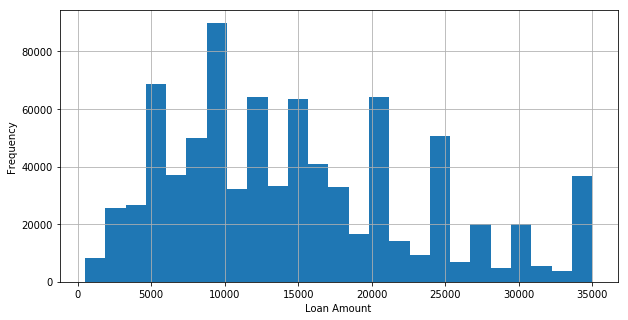

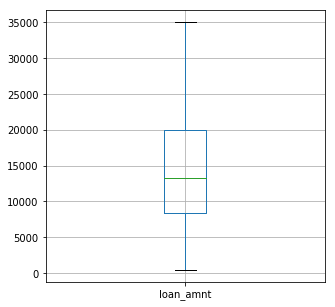

In [14]:
loan['loan_amnt'].hist(figsize=(10,5),bins=25)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount')
plt.show()
la = loan.boxplot(column='loan_amnt', figsize=(5,5))

### Interest Rate Details

In [15]:
loan.int_rate.describe()

count    825807.000000
mean         13.234242
std           4.385921
min           5.320000
25%           9.990000
50%          12.990000
75%          16.200000
max          28.990000
Name: int_rate, dtype: float64

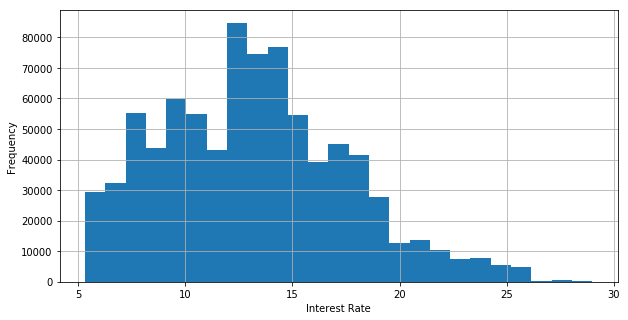

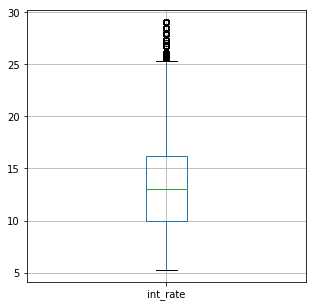

In [16]:
loan['int_rate'].hist(figsize=(10,5),bins=25)
plt.ylabel('Frequency')
plt.xlabel('Interest Rate')
plt.show()
ir = loan.boxplot(column='int_rate', figsize=(5,5))

In [17]:
loan.groupby('grade')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,139435.0,7.249859,0.974191,5.32,6.49,7.26,7.89,9.63
B,237859.0,10.840587,1.444675,6.00,9.76,10.99,11.99,14.09
C,228406.0,13.994039,1.229554,6.00,12.99,13.99,14.65,17.27
D,128636.0,17.194871,1.235698,6.00,16.29,16.99,17.86,20.31
E,65292.0,19.932491,1.459241,6.00,18.79,19.99,20.99,23.40
F,21227.0,23.644785,1.391524,6.00,22.99,23.83,24.50,26.06
G,4952.0,25.842609,1.524698,17.34,25.80,25.83,26.06,28.99


C:\Users\Marshall2\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


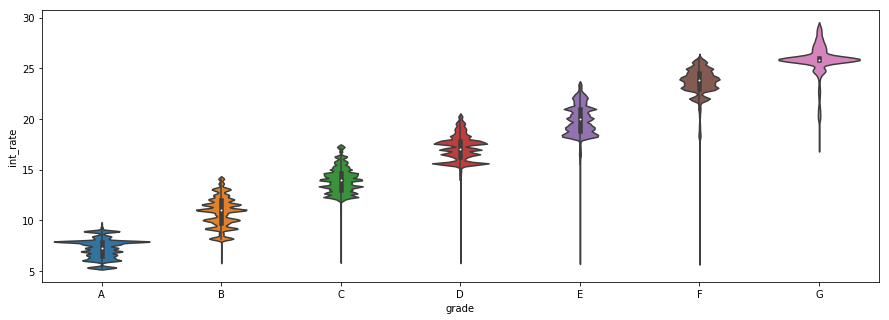

In [18]:
plt.subplots(figsize=(15,5))
sns.violinplot(x='grade', y='int_rate', data=loan, order='ABCDEFG');

# What Factors explain on-time loan repayments?

In [19]:
loan.loan_status.value_counts()

Current               568679
Fully Paid            200203
Charged Off            42690
Late (31-120 days)     10872
Late (16-30 days)       2215
Default                 1148
Name: loan_status, dtype: int64

In [20]:
# Determining the loans that are bad from loan_status column

bad_loan = ["Charged Off", "Default", "Late (16-30 days)", "Late (31-120 days)"]


loan['loan_condition'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
loan['loan_condition'] = loan['loan_status'].apply(loan_condition)

In [21]:
loan = loan.drop(['loan_status'], axis=1)
loan.loan_condition.value_counts()

Good Loan    768882
Bad Loan      56925
Name: loan_condition, dtype: int64

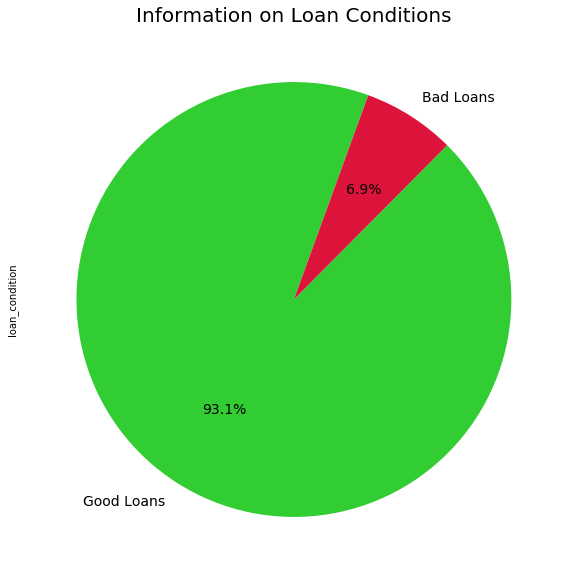

In [22]:
colors = ["LimeGreen", "Crimson"]
labels ="Good Loans", "Bad Loans"

plt.title('Information on Loan Conditions', fontsize=20)

loan["loan_condition"].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, labels=labels, fontsize=14, startangle=70, figsize=(15,10))

In [23]:
mapping_dict = {"emp_length":{"10+ years": 10,"9 years": 9,"8 years": 8,"7 years": 7,"6 years": 6,"5 years": 5,
        "4 years": 4,"3 years": 3,"2 years": 2,"1 year": 1,"< 1 year": 0},
                
                "grade":{"A": 1,"B": 2,"C": 3,"D": 4,"E": 5,"F": 6,"G": 7}}

loan = loan.replace(mapping_dict)

In [24]:
nominal_columns = ["term", "home_ownership", "pymnt_plan", "purpose", "application_type","loan_condition"]
dummy_df = pd.get_dummies(loan[nominal_columns])
loan = pd.concat([loan, dummy_df], axis=1)
loan = loan.drop(nominal_columns, axis=1)

In [25]:
loan.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,loan_condition_Bad Loan,loan_condition_Good Loan
0,5000.0,10.65,162.87,2,10,24000.0,27.65,3.0,0.0,9.0,...,0,0,0,0,0,0,1,0,0,1
1,2500.0,15.27,59.83,3,0,30000.0,1.00,3.0,0.0,4.0,...,0,0,0,0,0,0,1,0,1,0
2,2400.0,15.96,84.33,3,10,12252.0,8.72,2.0,0.0,10.0,...,0,0,0,1,0,0,1,0,0,1
3,10000.0,13.49,339.31,3,10,49200.0,20.00,10.0,0.0,37.0,...,0,1,0,0,0,0,1,0,0,1
4,3000.0,12.69,67.79,2,1,80000.0,17.94,15.0,0.0,38.0,...,0,1,0,0,0,0,1,0,0,1


###### I have chosen to use a correlation matrix to find which factors most explain on time loan re-payments

In [26]:
# I chose a correlation matrix becuase it easily demonstrates how each variable is related to one another

In [27]:
loan.corr()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,loan_condition_Bad Loan,loan_condition_Good Loan
loan_amnt,1.000000,0.149255,0.944045,0.157259,0.105214,0.328623,0.045749,0.191873,-0.076109,0.219695,...,-0.064000,-0.127999,-0.014750,0.008125,-0.073628,-0.027075,-0.011872,0.011872,0.003686,-0.003686
int_rate,0.149255,1.000000,0.135949,0.955197,0.010170,-0.073711,0.162561,-0.008562,0.052924,-0.036583,...,0.044144,0.091667,0.012643,0.075174,0.018499,0.010812,-0.008754,0.008754,0.174244,-0.174244
installment,0.944045,0.135949,1.000000,0.133455,0.089703,0.322713,0.030521,0.177065,-0.065182,0.197102,...,-0.058293,-0.115557,-0.012514,0.021981,-0.069914,-0.023053,-0.009486,0.009486,0.013729,-0.013729
grade,0.157259,0.955197,0.133455,1.000000,0.006670,-0.064913,0.170480,0.002387,0.061255,-0.031433,...,0.044205,0.091346,0.013029,0.076335,0.018510,0.005830,-0.011798,0.011798,0.146242,-0.146242
emp_length,0.105214,0.010170,0.089703,0.006670,1.000000,0.063842,0.043157,0.038382,0.031984,0.101904,...,-0.036186,-0.006858,0.000228,-0.016403,0.005019,-0.022591,-0.000483,0.000483,-0.015597,0.015597
annual_inc,0.328623,-0.073711,0.322713,-0.064913,0.063842,1.000000,-0.179353,0.132954,-0.002891,0.185884,...,-0.007838,-0.017580,-0.000965,0.023466,-0.008812,-0.005347,0.004992,-0.004992,-0.036143,0.036143
dti,0.045749,0.162561,0.030521,0.170480,0.043157,-0.179353,1.000000,0.305240,-0.048787,0.229122,...,-0.018949,-0.035242,-0.007586,-0.053463,-0.008244,-0.025697,-0.024950,0.024950,0.020570,-0.020570
open_acc,0.191873,-0.008562,0.177065,0.002387,0.038382,0.132954,0.305240,1.000000,-0.022477,0.695862,...,-0.017917,-0.051408,-0.007294,-0.032257,-0.015220,-0.018781,0.001612,-0.001612,-0.015825,0.015825
pub_rec,-0.076109,0.052924,-0.065182,0.061255,0.031984,-0.002891,-0.048787,-0.022477,1.000000,0.013579,...,-0.002318,0.007941,0.001152,0.012066,0.001438,-0.012547,-0.002993,0.002993,-0.014957,0.014957
total_acc,0.219695,-0.036583,0.197102,-0.031433,0.101904,0.185884,0.229122,0.695862,0.013579,1.000000,...,-0.020360,-0.048230,-0.006201,-0.023378,-0.013034,-0.022574,0.000498,-0.000498,-0.018026,0.018026


###### According to my correlation matrix the following features had the highest correlation with Good Loans (current or fully paid):

###### Annual Income, Loan Term of 36 months, Home Ownership Mortgage and Employment Length

In [28]:
# Also it was discovered that the variables of interest rate, grade, Loan Term 60 months and Installment size
# all had negative correlations to Good Loans

# If I were a lender what would I opt for to determine if a given loan should be given?

### Logistic Regression Model

In [29]:
# I chose to use a Logistic Regression model because they help predict classification problems, as I am trying to predict
# whether or not a loan is Good or not from the view of a lender

In [30]:
feature_cols = ['annual_inc','emp_length','dti']

In [31]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

X = loan[feature_cols]
y = loan['loan_condition_Good Loan']

logreg.fit(X,y)
pred = logreg.predict(X)

print(logreg.intercept_)
print(logreg.coef_)

C:\Users\Marshall2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.00341285]
[[2.10028099e-05 1.61766535e-02 5.55568512e-02]]


#### Store the predicted probabilities of class 1 (Good Loans)

In [32]:
loan['loan_status_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [33]:
loan.head()

,loan_amnt,int_rate,installment,grade,emp_length,annual_inc,dti,open_acc,pub_rec,total_acc,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_INDIVIDUAL,application_type_JOINT,loan_condition_Bad Loan,loan_condition_Good Loan,loan_status_pred_prob
0,5000.0,10.65,162.87,2,10,24000.0,27.65,3.0,0.0,9.0,...,0,0,0,0,0,1,0,0,1,0.900733
1,2500.0,15.27,59.83,3,0,30000.0,1.00,3.0,0.0,4.0,...,0,0,0,0,0,1,0,1,0,0.665756
2,2400.0,15.96,84.33,3,10,12252.0,8.72,2.0,0.0,10.0,...,0,0,1,0,0,1,0,0,1,0.712378
3,10000.0,13.49,339.31,3,10,49200.0,20.00,10.0,0.0,37.0,...,1,0,0,0,0,1,0,0,1,0.909673
4,3000.0,12.69,67.79,2,1,80000.0,17.94,15.0,0.0,38.0,...,1,0,0,0,0,1,0,0,1,0.936820


### Test/Train Split Logistic Regression Model

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = loan[feature_cols]
y = loan['loan_condition_Good Loan']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=40)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

LR.score(X_test, y_test)

C:\Users\Marshall2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9314368473059113

In [35]:
print(LR.intercept_)
print(LR.coef_)

[0.00339229]
[[2.10545093e-05 1.61385705e-02 5.54304804e-02]]


In [36]:
# Cross validate model with confusion matrix

In [37]:
logit_simple = linear_model.LogisticRegression(C=1e9).fit(X_train, y_train)

C:\Users\Marshall2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

#### Confusion Matrix

In [40]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .53)

array([[     0,  14155],
       [     0, 192297]], dtype=int64)

In [41]:
metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .75)

array([[   246,  13909],
       [  2421, 189876]], dtype=int64)

### As a Lender I would recommend taking on any loan that meets the requirement of a predicted probability of greater then 53% in this model.  By doing this we will take on more risk and higher % of bad loans, but will capitalize on more profit from accepting a greater number of good loans.

### KNN

In [42]:
# I chose to make a KNN model for because it is also a model used in classification and it is nonparametric in nature

In [43]:
X = loan[feature_cols]
y = loan['loan_condition_Good Loan']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.8728469571619554


In [44]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print((metrics.accuracy_score(y_test, y_pred_class)))

0.9309088795458509
